In [397]:
%matplotlib inline
import nltk
# import spacy
# import json_lines
import pandas as pd
from nltk.tokenize import word_tokenize

In [547]:
testFile = 'E:/CODE/NLP/clickbait/train1703/train1703.jsonl'
testData = pd.read_json(valfile, lines=True)

In [548]:
testLabelsFile = 'E:/CODE/NLP/clickbait/train1703/traintruth1703.jsonl'
testLabels = pd.read_json(vallabelsfile, lines=True)

In [549]:
# Join data + labels
def label(data, labels):
    return pd.concat([valdata, vallabels['truthClass']], axis=1, join_axes=[valdata.index])

test = label(testData, testLabels)

In [558]:
testClick = test[test.truthClass == "clickbait"]
testNoClick = test[test.truthClass == "no-clickbait"]

In [581]:
testClick.targetTitle.iloc[0]
testClick.targetKeywords.iloc[0]

''

In [574]:
# posFreq: returns a vector with the frequency of every POS in a given content
def posFreq(content):
#     return nltk.pos_tag_sents(str(content).strip('[]'))
#     return nltk.pos_tag(content)
    
    posTags = pd.DataFrame(nltk.pos_tag(nltk.word_tokenize(str(content)[2:-2])))
    posFrequencies = posTags[1].value_counts()
    totalWords = posFrequencies.sum()
    posFreqNormlized = posFrequencies/totalWords
    return posFreqNormlized
    
testClickPostTextPOS = testClick['targetTitle'].apply(posFreq)
# testNoClickPostTextPOS = testNoClick['targetKeywords'].apply(posFreq)
# posFrequencies.mean() # get the mean of the counts

KeyError: 1

In [ ]:
testCFreq = testClickPostTextPOS.mean()
testNCFreq = testNoClickPostTextPOS.mean()

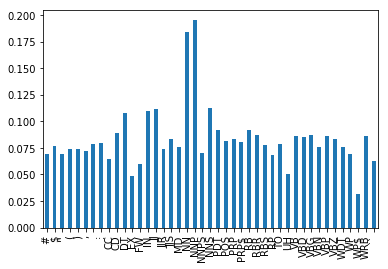

In [567]:
testCFreq.plot('bar')

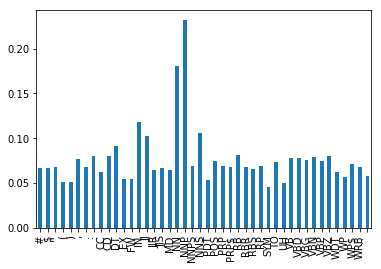

In [568]:
testNCFreq.plot('bar')

0.2219067540233529

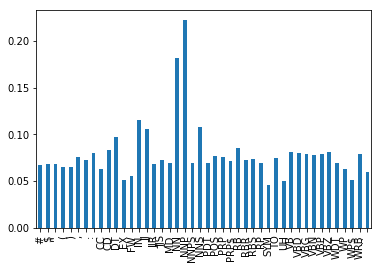

In [510]:
posFrequencies.iloc[0].sum()
# posFrequencies['#'].iloc[1] # percentage of '#' in this content
posMeans = posFrequencies.mean()
posMeans.plot('bar')
posMeans.max/

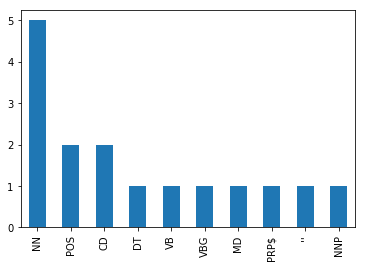

In [439]:
postag = pd.DataFrame(posFreq(valdata['postText'][0]))
postag[1].value_counts().plot('bar')

In [398]:
# To measure elapsed command time
import timeit

start = timeit.timeit()
print "hello"
end = timeit.timeit()
print end - start

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("hello")? (<ipython-input-398-38cbea56f3d7>, line 5)